This figure and example are take from 
OpenCV shape detection module by PyImageSearch.com. Which is a paid course for learning machince vision and openCV.  
The code has been simplified for the more novice use and used under the free educational resource license

These are some good youTube videos:

https://pysource.com/2018/09/25/simple-shape-detection-opencv-with-python-3/
https://pysource.com/2018/12/29/real-time-shape-detection-opencv-with-python-3/


In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
from IPython import display
import cv2
from google.colab.patches import cv2_imshow
import argparse
import imutils  #this is open source image tools (utilities) for image processing, https://anaconda.org/conda-forge/imutils, made by the creator of PyimageSearch.com
drive.mount('/content/drive')

Mounted at /content/drive


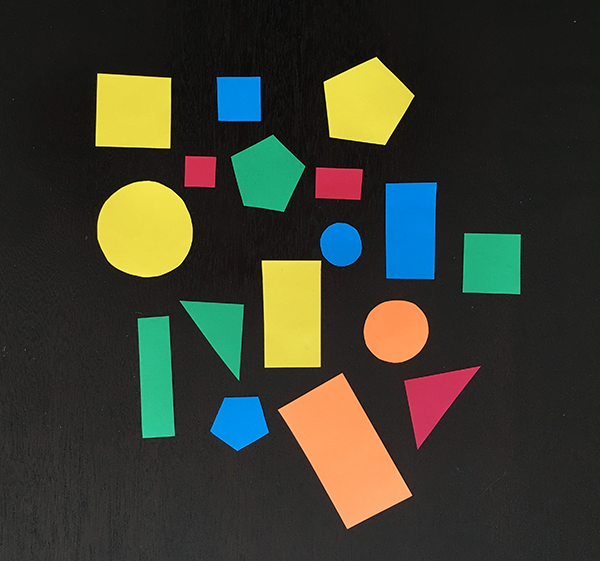

In [3]:
Shapes = r'/content/drive/MyDrive/SCIP_DATA/Images/shapes.png' 
colorIM = cv2.imread(Shapes) #Read the color image of difference shape. 
cv2_imshow(colorIM)

The goal of this excercise is to approximate the shapes using a polygon approximation algorithm from openCV to determine the number of sides and based on the number of sides assign the shape of each detected object (using the same detection strategy we used in the weeks before).  We will then put an label in the center of the shape of what we based using the polygon algorithm.  We will use the momement feature (described this week) to find the center of each object. 

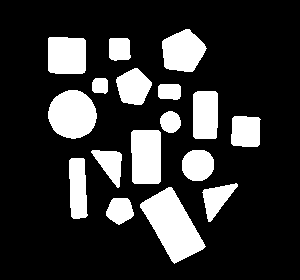

In [18]:
# Our image if too large for the algoritim to work well.  So we to The goal of this section is to 1) resize the image 2) perform detection
IM = colorIM  # our working image
resizedIM = imutils.resize(IM, width=300)  #using the open source imutils tool to resixze an image
ratio = IM.shape[0] / float(resizedIM.shape[0])  #we record the factor to use later to resize back to original size- why does this work?

# convert the resized image to grayscale, blur it, and then perform threshold 
grayIM = cv2.cvtColor(resizedIM, cv2.COLOR_BGR2GRAY)
blurredIM = cv2.medianBlur(grayIM,5)
ret,threshIM = cv2.threshold(blurredIM, 60, 255, cv2.THRESH_BINARY)
cv2_imshow(threshIM)

# find contours in the thresholded image
contourList, hierarchy = cv2.findContours(threshIM.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#contourIM = cv2.findContours(threshIM.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#contourIM = imutils.grab_contours(contourIM)


In [19]:
#this is a function that inputs the contour and outputs the shape based on a polygon algorithm. 
#the output is a string for the name of the object
def detect_shapes(ContoursL):
		# initialize the shape name and approximate the contour
		shape = "Unidentified"  

		peri = cv2.arcLength(ContoursL, True)  # https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html
		approx = cv2.approxPolyDP(ContoursL, 0.04 * peri, True) #

		# if the shape is a triangle, it will have 3 vertices
		if len(approx) == 3:
			shape = "Triangle"

		# if the shape has 4 vertices, it is either a square or a rectangle

		elif len(approx) == 4:
			# compute the bounding box of the contour and use the bounding box to compute the aspect ratio
			(x, y, w, h) = cv2.boundingRect(approx) #https://docs.opencv.org/3.4/dd/d49/tutorial_py_contour_features.html
			ar = w / float(h)  #this is called the aspect ratio (ar) 

			# a square will have an aspect ratio about one, otherwise, the shape is a rectangle

			shape = "Square" if ar >= 0.95 and ar <= 1.05 else "Rectangle"

		# if the shape is a pentagon, it will have 5 vertices
		elif len(approx) == 5:
			shape = "Pentagon"

		# otherwise, we call the shape a circle
		else:
			shape = "Circle"

		# return the name of the shape
		return shape

this section we first compute the center of the contour, then use the above detect_shape function to determine the shape of the obeject based on the contour of that object. 

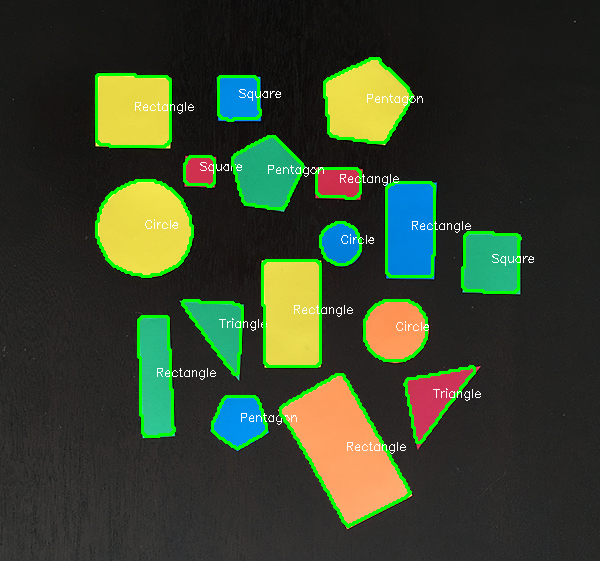

In [22]:
IM_2 = IM.copy() #make a copy of the object
for contours in contourList:
	M = cv2.moments(contours) #https://learnopencv.com/tag/cv2-moments/
	cX = int((M["m10"] / M["m00"]) * ratio)  #this finds the center on the smaller image and scales to the larger
	cY = int((M["m01"] / M["m00"]) * ratio)  #this finds the center on the smaller image and scales to the larger
	shape = detect_shapes(contours)  

	# multiply the contour (x, y)-coordinates by the resize ratio,
	# then draw the contours and the name of the shape on the image
	contours= contours.astype("float")  #converts contours to float for resizing
	contours *= ratio #resizes the contours
	contours = contours.astype("int") #converts back to integers
	cv2.drawContours(IM_2, [contours], -1, (0, 255, 0), 2) #draws the green contours on the larger image
	cv2.putText(IM_2, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,0.4, (255, 255, 255), 1) #puts the name on the center of the object
cv2_imshow(IM_2)